Importing libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

Reading the file 

In [4]:
data = pd.read_csv(r'C:\Users\radek\IronHack\IronRadek\Week7\Project7_Supervised_Learning\data_encoded.csv')

In [5]:
data.head()

,year,kind,rating,vote,country,runtime,genre1,genre2
0,2003.0,2,7.7,474.0,62,50.000000,6,2
1,1994.0,7,8.1,18.0,62,83.000000,8,27
2,1992.0,1,5.5,93.0,37,102.887743,0,20
3,2004.0,1,5.3,13432.0,62,60.000000,6,4
4,1991.0,1,4.5,2177.0,62,96.000000,4,13


We should have an integer number as a traget. Since rating is our target and it is a float, we will change it into an integer

In [6]:
data.rating = data.rating.map(round)

In [7]:
data.dtypes

year       float64
kind         int64
rating       int64
vote       float64
country      int64
runtime    float64
genre1       int64
genre2       int64
dtype: object

In [31]:
data.head()

,year,kind,rating,vote,country,runtime,genre1,genre2
0,2003.0,2,8,474.0,62,50.000000,6,2
1,1994.0,7,8,18.0,62,83.000000,8,27
2,1992.0,1,6,93.0,37,102.887743,0,20
3,2004.0,1,5,13432.0,62,60.000000,6,4
4,1991.0,1,4,2177.0,62,96.000000,4,13


In [136]:
data.rating.value_counts()

7    2492
8    1990
6    1901
5     694
4     396
9     268
3     130
2      44
Name: rating, dtype: int64

We dfine X and y 

In [32]:
X= data.drop('rating', axis=1)
y=data['rating']

# Features Selection

We start with Select from model

In [33]:
SFM = SelectFromModel(estimator=RandomForestClassifier())
s=SFM.fit(X, y)

In [34]:
n_features = s.transform(X).shape[1]

print(f'Number of features: {n_features}')
feature_idx = s.get_support()
feature_name = X.columns[feature_idx]
print(f'Features selected:\n{feature_name}') 

Number of features: 3
Features selected:
Index(['year', 'vote', 'runtime'], dtype='object')


RFE

In [36]:
rfe_selector = RFE(estimator=RandomForestClassifier())
m=rfe_selector.fit(X, y)
X.columns[m.get_support()]
print("Num Features: %s" % (m.n_features_))
print("Selected Features: %s" % (m.support_))
print("Feature Ranking: %s" % (m.ranking_))

Num Features: 3
Selected Features: [ True False  True False  True False False]
Feature Ranking: [1 5 1 4 1 3 2]


RFECV

In [38]:
rfecv = RFECV(
    estimator=RandomForestClassifier(),
    min_features_to_select=2,
    step=1,
    n_jobs=-1,
    verbose=1,
    scoring="r2",
    cv=5,
)

m= rfecv.fit(X, y)

In [39]:
X.columns[rfecv.support_]

Index(['year', 'kind', 'vote', 'country', 'runtime', 'genre1', 'genre2'], dtype='object')

The two first methods of feature selection suggested to take only year, vote and runtime, but since we used label encoder to encode data, we do not have a lot of columns/features. Therefore we will take all of out freatures for our models

# Hyperparameters tuning

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## RidgeClassifier

Classifier using Ridge regression.

This classifier first converts the target values into {-1, 1} and then treats the problem as a regression task (multi-output regression in the multiclass case).

It is necessary to standarize data before using Ridge Classifier

In [43]:
X_stand = StandardScaler().fit_transform(X)

In [50]:
grid_search = GridSearchCV(RidgeClassifier(),
                           {
                              'max_iter':np.arange(1,100,1)

                            
                            },cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
grid_search.fit(X_stand,y)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5, estimator=RidgeClassifier(), n_jobs=-1,
             param_grid={'max_iter': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='accuracy', verbose=1)

In [51]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_iter': 1}
0.3334175615919141


In [93]:
grid_search = GridSearchCV(RidgeClassifier(),
                           {'alpha':np.arange(600,800,20)},cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
grid_search.fit(X_stand,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RidgeClassifier(), n_jobs=-1,
             param_grid={'alpha': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
             scoring='accuracy', verbose=1)

In [94]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 700}
0.337207833228048


In [123]:
rand_search = RandomizedSearchCV(RidgeClassifier(),
                           {'alpha':np.arange(600,800,20)},cv=5, scoring="balanced_accuracy",verbose=1,n_jobs=-1
                           )
rand_search.fit(X_stand,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RidgeClassifier(), n_jobs=-1,
                   param_distributions={'alpha': array([600, 620, 640, 660, 680, 700, 720, 740, 760, 780])},
                   scoring='balanced_accuracy', verbose=1)

In [124]:
print(rand_search.best_params_)
print(rand_search.best_score_)

{'alpha': 680}
0.1412072993665381


## SVC 

In [99]:
grid_search = GridSearchCV(SVC(),
                           {"gamma": np.arange(0.001, 0.1), "C": range(1, 10)},cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
grid_search.fit(X_stand,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(1, 10), 'gamma': array([0.001])},
             scoring='accuracy', verbose=1)

In [100]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 9, 'gamma': 0.001}
0.33922931143398616


In [101]:
rand_search = RandomizedSearchCV(SVC(),
                            {"gamma": np.arange(0.001, 0.1), "C": range(1, 10)},cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
rand_search.fit(X_stand,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': range(1, 10),
                                        'gamma': array([0.001])},
                   scoring='accuracy', verbose=1)

In [102]:
print(rand_search.best_params_)
print(rand_search.best_score_)

{'gamma': 0.001, 'C': 9}
0.33922931143398616


## Categorical Naive Bayes Classifier

Naïve Bayes classifiers are a family of probabilistic classifiers based on Bayes Theorem with a strong assumption of independence between the features. These are not only fast and reliable but also simple and easiest classifier which is proving its stability in machine learning world. Despite its simplicity, it gives accurate prediction in text classification problems.

In [75]:
grid_search = GridSearchCV(CategoricalNB(),
                           {'alpha':np.arange(100,800,100)}
         cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
grid_search.fit(X,y)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=CategoricalNB(), n_jobs=-1,
             param_grid={'min_categories': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='accuracy', verbose=1)

In [76]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'min_categories': 1}
nan


In [116]:
rand_search = RandomizedSearchCV(CategoricalNB(),
                           {'alpha':np.arange(0.1,1,0.1),
                           'min_categories': np.arange(1,10)}
         ,cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
rand_search.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=CategoricalNB(), n_jobs=-1,
                   param_distributions={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'min_categories': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   scoring='accuracy', verbose=1)

In [120]:
print(rand_search.best_params_)
print(rand_search.best_score_)

{'min_categories': 7, 'alpha': 0.1}
nan


In [118]:
m=CategoricalNB(min_categories= 7).fit(X,y)

In [119]:
m.score(X,y)

0.6092229943145926

{'min_categories': 7, 'alpha': 0.1}
nan


## Extra Trees Classifier

ExtraTreesClassifier

In [82]:
grid_search = GridSearchCV(ExtraTreesClassifier(),
                           {
                              'n_estimators':np.arange(200,250,5),
                              'max_depth': np.arange(1,20,2)

                            
                            },cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
grid_search.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'n_estimators': array([200, 205, 210, 215, 220, 225, 230, 235, 240, 245])},
             scoring='accuracy', verbose=1)

In [83]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 19, 'n_estimators': 220}
0.49463044851547694


In [79]:
rand_search = RandomizedSearchCV(ExtraTreesClassifier(),
                           {
                            'n_estimators':np.arange(1,400,5),
                            'max_depth': np.arange(1,20,1)
                            
                            },cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
rand_search.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'n_estimators': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
       196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256,
       261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321,
       326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386,
       391, 396])},
                   scoring='accuracy', verbose=1)

In [80]:
print(rand_search.best_params_)
print(rand_search.best_score_)

{'n_estimators': 226, 'max_depth': 19}
0.4955148452305749


# Models testing

In [126]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 

Split the data into train and test

In [121]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6332, 7)
(6332,)
(1583, 7)
(1583,)


Now lets split standarized data into train and test for SVC and Ridge Classifier models

In [122]:
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(X_stand, y, test_size=0.2, random_state=5)
print(x_train_st.shape)
print(y_train_st.shape)
print(x_test_st.shape)
print(y_test_st.shape)

(6332, 7)
(6332,)
(1583, 7)
(1583,)


## Ridge Classifier

For this model through hyperparameter testing we established that optimal parameter is:
- alpha = 700

The accuracy for Ridge Classifier is: 33.92293114339861 %

The classification report for Ridge Classifier is:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        82
           5       0.00      0.00      0.00       132
           6       0.00      0.00      0.00       379
           7       0.34      0.84      0.48       494
           8       0.34      0.30      0.32       406
           9       0.00      0.00      0.00        55

    accuracy                           0.34      1583
   macro avg       0.09      0.14      0.10      1583
weighted avg       0.19      0.34      0.23      1583



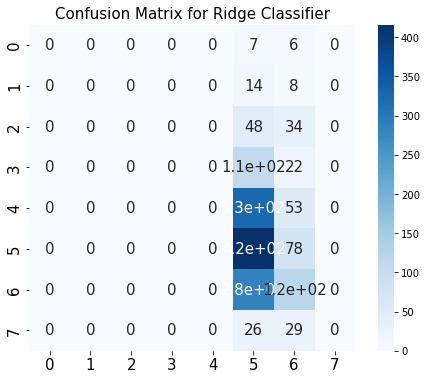

In [130]:
rc = RidgeClassifier(alpha=700)
rc.fit(x_train_st, y_train_st)
y_pred = rc.predict(x_test_st)
acc_rc = rc.score(x_test_st, y_test_st)
print('The accuracy for Ridge Classifier is:', acc_rc * 100, "%")
generate_results(rc, y_pred, 'Ridge Classifier')

## SVC

Based on the hyperparameter tuning we established that the best parameters are: 
- 'C': 9, 
- 'gamma': 0.001

The accuracy for SVC is: 34.55464308275427 %

The classification report for SVC is:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        82
           5       0.00      0.00      0.00       132
           6       1.00      0.00      0.01       379
           7       0.34      0.91      0.50       494
           8       0.35      0.24      0.28       406
           9       1.00      0.02      0.04        55

    accuracy                           0.35      1583
   macro avg       0.34      0.15      0.10      1583
weighted avg       0.47      0.35      0.23      1583



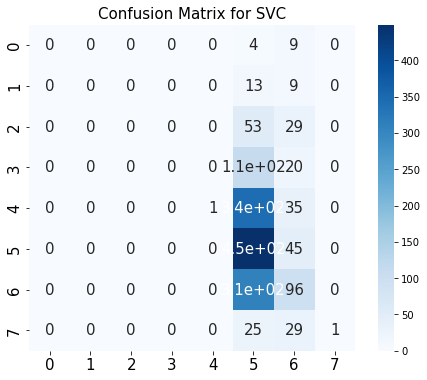

In [129]:
svc = SVC(C=9,gamma=0.001)
svc.fit(x_train_st, y_train_st)
y_pred = svc.predict(x_test_st)
acc_svc = svc.score(x_test_st, y_test_st)
print('The accuracy for SVC is:', acc_svc * 100, "%")
generate_results(svc, y_pred, 'SVC')

## Categorical NB Classifier

The best parameters after hyperparameters tuning are: 
- 'min_categories': 7, 
- 'alpha': 0.1

The accuracy for cNB is: 40.05053695514845 %

The classification report for cNB is:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        22
           4       0.44      0.13      0.21        82
           5       0.22      0.11      0.14       132
           6       0.37      0.46      0.41       379
           7       0.40      0.47      0.43       494
           8       0.46      0.48      0.47       406
           9       0.69      0.16      0.26        55

    accuracy                           0.40      1583
   macro avg       0.32      0.23      0.24      1583
weighted avg       0.39      0.40      0.38      1583



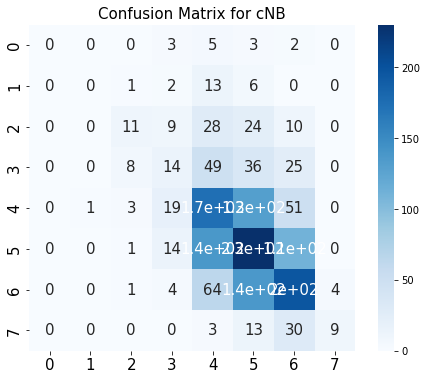

In [134]:
cNB = CategoricalNB(min_categories=7,alpha=0.1)
cNB.fit(x_train, y_train)
y_pred = cNB.predict(x_test)
acc_cNB = cNB.score(x_test, y_test)
print('The accuracy for cNB is:', acc_cNB * 100, "%")
generate_results(cNB, y_pred, 'cNB')

## Extra Trees CLassifier

After hyperparameter tunning we know that the best parameters are: 
- 'n_estimators': 226, 
- 'max_depth': 19

The accuracy for etc is: 47.50473783954517 %

The classification report for etc is:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        13
           3       0.11      0.05      0.06        22
           4       0.28      0.16      0.20        82
           5       0.20      0.07      0.10       132
           6       0.41      0.43      0.42       379
           7       0.45      0.63      0.53       494
           8       0.64      0.58      0.61       406
           9       0.79      0.35      0.48        55

    accuracy                           0.48      1583
   macro avg       0.36      0.28      0.30      1583
weighted avg       0.46      0.48      0.46      1583



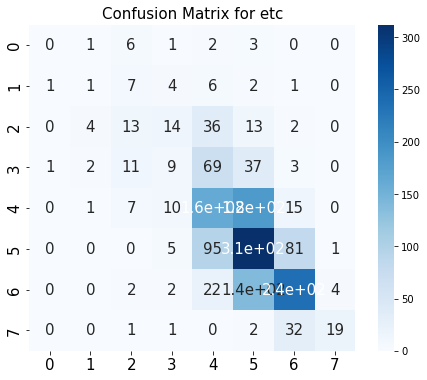

In [135]:
etc = ExtraTreesClassifier(n_estimators=226,max_depth=19)
etc.fit(x_train, y_train)
y_pred = etc.predict(x_test)
acc_etc = etc.score(x_test, y_test)
print('The accuracy for etc is:', acc_etc * 100, "%")
generate_results(etc, y_pred, 'etc')